# Loading the 2014 Coco training dataset
This notebook processes the 2014 Coco training dataset, sorting it into an input list of images (`X_train`) and output list of their corresponding labels (`Y_train`). The lists are ordered so that `X_train[0]` represents an image whose labels correspond to the sublist at `Y_train[0]`.

Authors: Péter Hámori, Audrea Huang<br>
Date: 1 March 2021<br>
AIT Deep Learning<br>
Project Milestone 1

### Setup

In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
dataDir='annotations_trainval2014'
dataType='train2014'
annFile='/Users/audreahuang/Downloads/annotations/instances_train2014.json'.format(dataDir,dataType)

In [3]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=11.77s)
creating index...
index created!


### Display COCO categories and supercategories

In [4]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
appliance sports person food vehicle animal kitchen indoor electronic accessory outdoor furniture


### Get all images containing given categories
This prepares us to build the input (X) matrix.

In [5]:
catIds = coco.getCatIds(catNms=['car','chair','book', 'bottle'])
imgIds = coco.getImgIds(catIds=catIds )

In [6]:
catIds

[3, 44, 62, 84]

In [7]:
# label category with its corresponding id
catIdDict = {'car': 3, 'chair': 44, 'book': 62, 'bottle': 84}

In [63]:
carImgIds = coco.getImgIds(catIds = catIdDict['car'])
chairImgIds = coco.getImgIds(catIds = catIdDict['chair'])
bookImgIds = coco.getImgIds(catIds = catIdDict['book'])
bottleImgIds = coco.getImgIds(catIds = catIdDict['bottle'])

In [64]:
print(len(carImgIds), "images of cars")
print(len(chairImgIds), "images of chairs")
print(len(bookImgIds), "images of books")
print(len(bottleImgIds), "images of bottles")

8606 images of cars
5968 images of chairs
8950 images of books
3734 images of bottles


### Get all labels corresponding to a given image
This prepares us to build the output (Y) matrix.

In [48]:
def getLabel(imgID):
    ''' Given a single image ID, return the image's labels.
        From each annotation, extract the category id, then get the category name.
        
        :param   imgID (int)        : requested image ID
        
        :return: catNames (string[]): list of labels for that image
    '''

    annIds = coco.getAnnIds(imgIds=[imgID])
    catIds = [ann['category_id'] for ann in coco.loadAnns(ids=annIds)]
    cats = coco.loadCats(catIds)
    catNames = [cat['name'] for cat in cats]
    return catNames

In [49]:
getLabel(carImgIds[10])

['car', 'parking meter', 'parking meter']

In [65]:
getLabel(chairImgIds[0])

['dog',
 'couch',
 'chair',
 'couch',
 'couch',
 'dining table',
 'bottle',
 'cup',
 'cup',
 'cup',
 'chair',
 'chair']

### Create input and output matrices

In [89]:
X_train = list()
Y_train = list()

In [90]:
for i in range(len(carImgIds)):
    print(i)
    img = coco.loadImgs(carImgIds[i])[0]
    I = io.imread(img['coco_url'])
    X_train.append(I)
    
    labels = getLabel(carImgIds[i])
    Y_train.append(labels)
    
    if i == 9: # just look at first 10 images
        break

0
1
2
3
4
5
6
7
8
9


In [91]:
for i in range(10):
    img = coco.loadImgs(chairImgIds[i])[0]
    I = io.imread(img['coco_url'])
    X_train.append(I)
    
    labels = getLabel(chairImgIds[i])
    Y_train.append(labels)

In [92]:
for i in range(10):
    img = coco.loadImgs(bookImgIds[i])[0]
    I = io.imread(img['coco_url'])
    X_train.append(I)
    
    labels = getLabel(bookImgIds[i])
    Y_train.append(labels)

In [93]:
for i in range(10):
    img = coco.loadImgs(bottleImgIds[i])[0]
    I = io.imread(img['coco_url'])
    X_train.append(I)
    
    labels = getLabel(bottleImgIds[i])
    Y_train.append(labels)

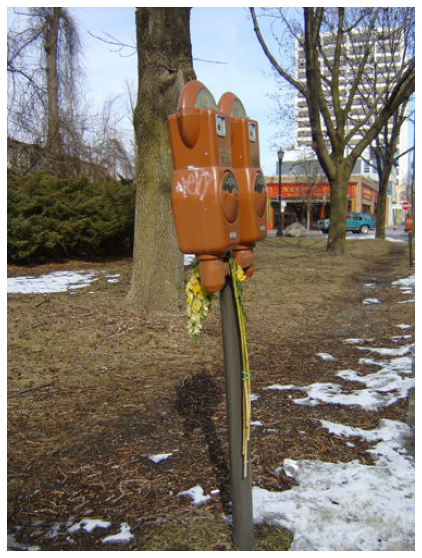

In [60]:
plt.axis('off')
plt.imshow(X_train[10])
plt.show()

In [94]:
len(Y_train)

40